In [5]:
import torch
x = torch.Tensor(2,3)
print(x)
print(x.size())
print(x.shape)
print(x.type())

tensor([[-4.9449e-38,  4.5846e-41,  2.0284e-11],
        [ 3.0679e-41,  1.3438e-39,  4.5846e-41]])
torch.Size([2, 3])
torch.Size([2, 3])
torch.FloatTensor


In [6]:
x = torch.tensor([[1,2,3],[4,5,6]])
print(x.size())
print(x.type())

torch.Size([2, 3])
torch.LongTensor


In [7]:
x_tensor = torch.tensor(data=[2.0,3.0],requires_grad=True)

In [9]:
x = torch.tensor(data=[2.0,3.0],requires_grad=True)
y = x**2
z = 2*y+3
target = torch.tensor([3.0,4.0])
loss = torch.sum(torch.abs(z-target))
loss.backward()
print(x.grad,y.grad,z.grad)

tensor([ 8., 12.]) None None


/opt/conda/lib/python3.7/site-packages/torch/tensor.py:746: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the gradient for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations.
  warnings.warn("The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad "


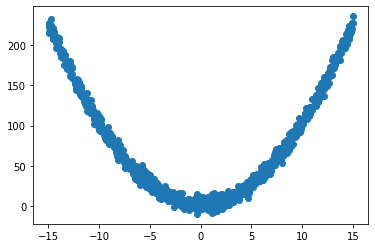

In [48]:
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
import seaborn as sns
import matplotlib.pyplot as plt

num_data = 1000
num_epoch = 10000

x = init.uniform_(torch.Tensor(num_data,1),-15,15)
noise = init.normal_(torch.FloatTensor(num_data,1),std=2)
y = x**2 + 3
y_noise = y + noise
plt.scatter(x,y_noise)
# plt.scatter(x,y)


In [38]:
model = nn.Sequential(nn.Linear(1,1))
#                        nn.ReLU(),
#                        nn.Linear(4,4),
#                        nn.ReLU(),
#                        nn.Linear(4,1))
loss_func =  nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=.1)

label = y_noise
for i in range(500):
    optimizer.zero_grad()
    output = model.forward(x)
    loss = loss_func(output,label)
    loss.backward()
    optimizer.step()
    if i % 100 ==0 :
        print(loss.data)
        param_list = list(model.parameters())
#     print(param_list)
        print(param_list[0].item(),param_list[1].item())

tensor(12.1800)
0.09771393239498138 0.23042897880077362
tensor(1.5815)
1.9959936141967773 3.065429210662842
tensor(1.5804)
1.9938361644744873 3.1398329734802246
tensor(1.5804)
1.9948755502700806 3.1442337036132812
tensor(1.5804)
1.995120644569397 3.1446337699890137


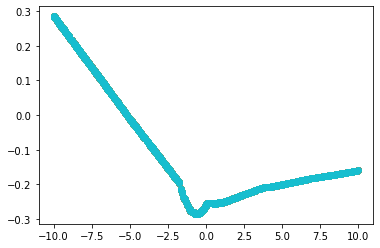

In [41]:
model = nn.Sequential(
            nn.Linear(1,6),
            nn.ReLU(),
            nn.Linear(6,10),
            nn.ReLU(),
            nn.Linear(10,6),
            nn.ReLU(),
            nn.Linear(6,1)
)
loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)
loss_arr=[]

for i in range(num_epoch):
    model.train()
    optimizer.zero_grad()
    output = model(x)
    loss = loss_func(output,y_noise)
    optimizer.step()
    loss_arr.append(loss)
    model.eval()
    with torch.no_grad():
        plt.scatter(x,model(x))